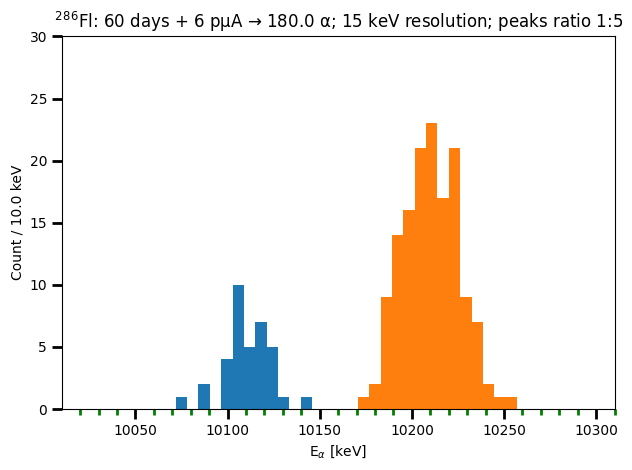

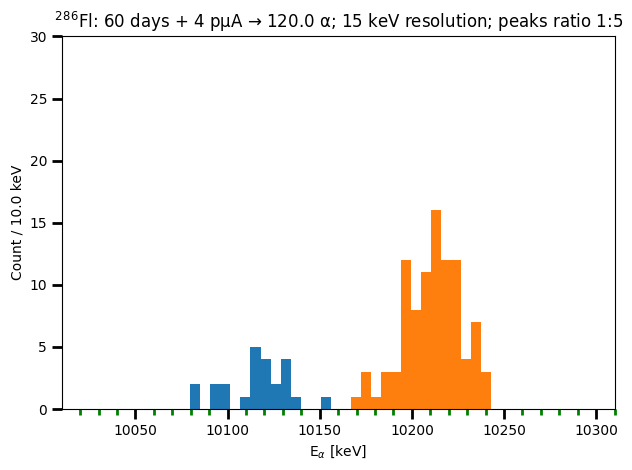

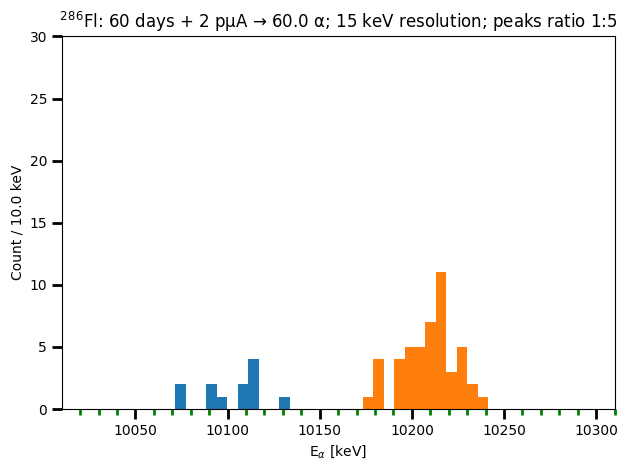

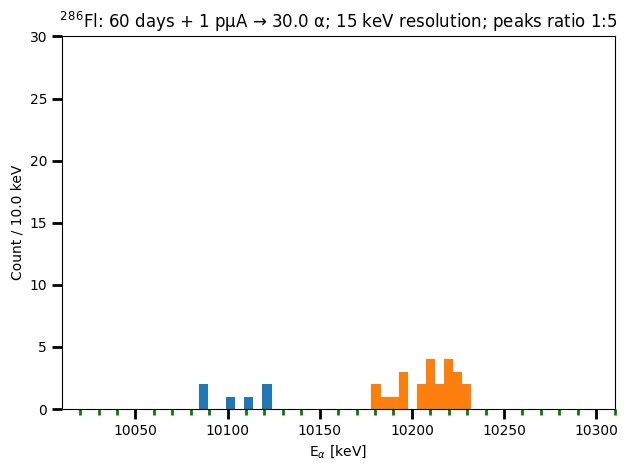

In [30]:
import numpy as np
import matplotlib.pyplot as plt


days = 60 # experiment duration
alpha_per_day_beam1 = 0.5 # for 1 pmkA

isotope = "$^2$$^8$$^6$Fl"
intensity1 = 1
intensity2 = 5
ratio1_2 = float(intensity1)/intensity2 # intensities of lines
center_shift = 100 # keV
center2 = 10210 # keV
center1 = center2 - center_shift # keV
scale = 15 # resolution of detector

beams = [6, 4, 2, 1] # pmkA

y_lim_max = alpha_per_day_beam1 * days * max(beams)/6
x_lim_delta = 100 # x paddings from plot box
x_lim_min = center1 - x_lim_delta
x_lim_max = center2 + x_lim_delta

bin_count = 30
bin_size = (x_lim_max - x_lim_min) / bin_count

for beam in beams:
    alpha_total = alpha_per_day_beam1 * days * beam
    lines = []
    for loc, size in [(center1, int(alpha_total * ratio1_2)), (center2, int(alpha_total * (1-ratio1_2)))]:
        line = np.random.normal(loc=loc, scale=scale, size=size)
        lines.append(line)

    plt.figure()
    bins=np.histogram(np.hstack((lines[0], lines[1])), bins=bin_count)[1] # get the bin edges
    plt.hist(lines[0], bins)
    plt.hist(lines[1], bins)
    plt.title(f"{isotope}: {days} days + {beam} pμA → {alpha_total} α; {scale} keV resolution; peaks ratio {intensity1}:{intensity2}")
    plt.xlabel(f"E$_α$ [keV]")
    plt.ylabel(f"Count / {bin_size} keV")
    ax = plt.gca()
    ax.set_xlim([x_lim_min, x_lim_max])
    ax.set_ylim([0, y_lim_max])
    plt.minorticks_on()
    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=7)
    ax.tick_params(axis="y", which='minor', length=0)
    ax.tick_params(axis="x", which='minor', length=4, color='g')
    plt.tight_layout()